In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('passengers.csv')
print(df)

       Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]


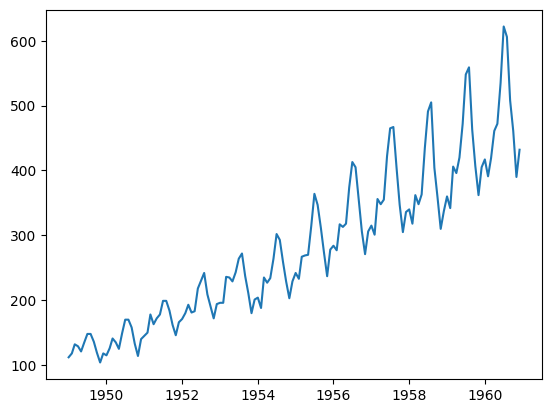

In [3]:
# 1. Описание годовой сезонности (график и словесное описание)
df["Month"] = pd.to_datetime(df["Month"])

plt.plot(df["Month"], df["#Passengers"])
plt.show()

# ежегодно пик в середине года (лето), положительный тренд

         Month  #Passengers
0   1949-01-01          112
12  1950-01-01          115
24  1951-01-01          145
36  1952-01-01          171
48  1953-01-01          196
60  1954-01-01          204
72  1955-01-01          242
84  1956-01-01          284
96  1957-01-01          315
108 1958-01-01          340
120 1959-01-01          360
132 1960-01-01          417


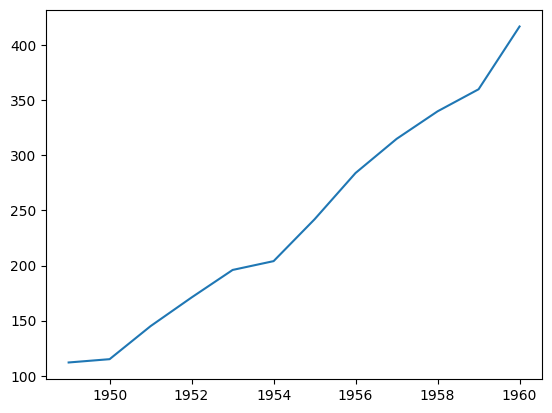

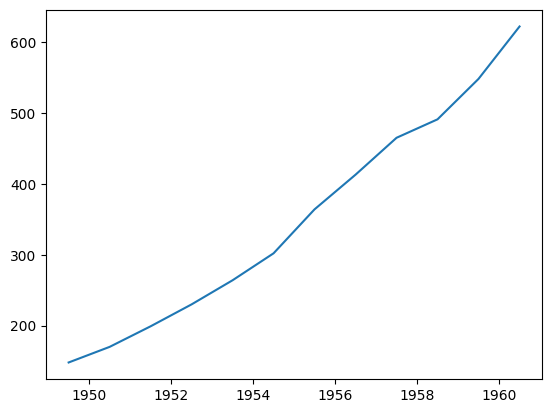

In [4]:
# 2. Исследовать данные по отдельному месяцу (для того, чтобы не брать в расчёт годовую сезонность). 
# Требуется сделать график и описание: 
# а) рассмотреть январь по разным годам

january_df = df[df["Month"].dt.strftime('%m') == '01']
print(january_df)

plt.plot(january_df["Month"], january_df["#Passengers"])
plt.show()

# на основе данных за 10 лет, в январе наблюдается положительный тренд

# б) июль
july_df = df[df["Month"].dt.strftime('%m') == '07']

plt.plot(july_df["Month"], july_df["#Passengers"])
plt.show()

# на основе данных за 10 лет, в июле наблюдается положительный тренд



In [5]:
# 3. Посчитать среднее и дисперсию по данным внутри каждого года

df['Year'] = df['Month'].dt.year

yearly_stats = df.groupby('Year').agg({'#Passengers': ['mean', 'var']})

yearly_stats.columns = ['Mean', 'Variance']
print(yearly_stats)

            Mean     Variance
Year                         
1949  126.666667   188.242424
1950  139.666667   363.696970
1951  170.166667   339.969697
1952  197.000000   527.454545
1953  225.000000   810.363636
1954  238.916667  1219.719697
1955  284.000000  1775.818182
1956  328.250000  2290.750000
1957  368.416667  3351.356061
1958  381.000000  4164.181818
1959  428.333333  4876.242424
1960  476.166667  6043.060606


0       NaN
1       6.0
2      14.0
3       3.0
4       8.0
       ... 
139    16.0
140    98.0
141    47.0
142    71.0
143    42.0
Name: abs_diff, Length: 144, dtype: float64


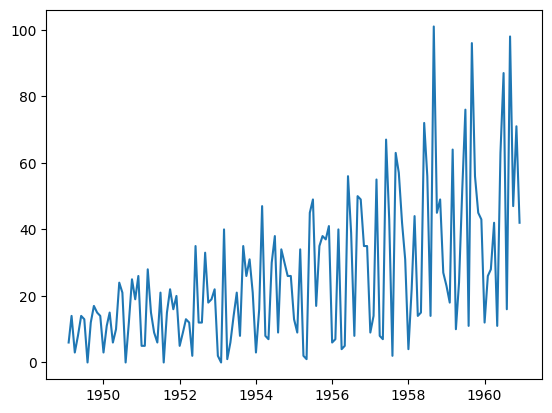

0            NaN
1       5.357143
2      11.864407
3      -2.272727
4      -6.201550
         ...    
139    -2.572347
140   -16.171617
141    -9.251969
142   -15.401302
143    10.769231
Name: rel_diff, Length: 144, dtype: float64


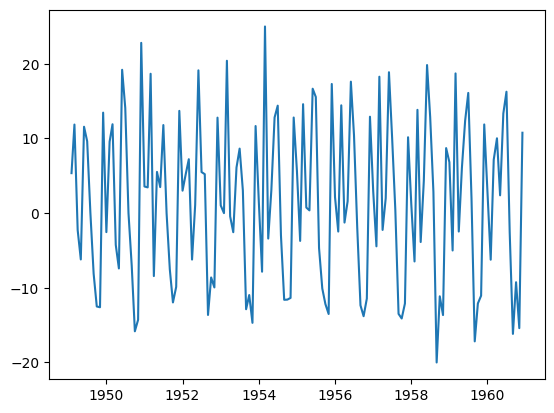

In [6]:
# 4. а) Построить абсолютные разности по данным (между соседними месяцами). Сделать график и описание.

df['abs_diff'] = abs(df['#Passengers'].diff())
print(df['abs_diff'])

plt.plot(df['Month'][1:], df['abs_diff'][1:])
plt.show()

#сезонность, положительный тренд, в 1958 пик

# б) Построить относительные разности (в % прироста). Сделать график и описание.

df['rel_diff'] = (df['#Passengers'].pct_change() * 100)
print(df['rel_diff'])

plt.plot(df['Month'][1:], df['rel_diff'][1:])
plt.show()

#Сильный разброс знаечний от отрийательных к положительным


In [7]:
# 5. а) Понижение частоты дискретизации до года (квартала)

yearly_df = df.resample('Y', on='Month').agg({'#Passengers': ['sum', 'mean', 'min', 'max', 'std']}).round(1)
print(yearly_df)

# используем среднее и стандартное отклонение

# б) Повышение частоты дискретизации до дня (недели). Рассмотреть целесообразность.

df_1 = df.copy()
weekly_df = df_1.resample('W', on='Month').agg({'#Passengers': ['sum', 'mean', 'min', 'max', 'std']}).round(1)
print(weekly_df)

# нецелесообразно, т. к. нет данных


           #Passengers                       
                   sum   mean  min  max   std
Month                                        
1949-12-31        1520  126.7  104  148  13.7
1950-12-31        1676  139.7  114  170  19.1
1951-12-31        2042  170.2  145  199  18.4
1952-12-31        2364  197.0  171  242  23.0
1953-12-31        2700  225.0  180  272  28.5
1954-12-31        2867  238.9  188  302  34.9
1955-12-31        3408  284.0  233  364  42.1
1956-12-31        3939  328.2  271  413  47.9
1957-12-31        4421  368.4  301  467  57.9
1958-12-31        4572  381.0  310  505  64.5
1959-12-31        5140  428.3  342  559  69.8
1960-12-31        5714  476.2  390  622  77.7
           #Passengers                         
                   sum   mean    min    max std
Month                                          
1949-01-02         112  112.0  112.0  112.0 NaN
1949-01-09           0    NaN    NaN    NaN NaN
1949-01-16           0    NaN    NaN    NaN NaN
1949-01-23           0

C:\Users\Smart\AppData\Local\Temp\ipykernel_17420\684563643.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_df = df.resample('Y', on='Month').agg({'#Passengers': ['sum', 'mean', 'min', 'max', 'std']}).round(1)


       Month  reference  target  missing  target_fixed
0 1949-01-01        112   112.0      NaN         112.0
1 1949-02-01        118   118.0      NaN         118.0
2 1949-03-01        132   132.0      NaN         132.0
3 1949-04-01        129     NaN    129.0         126.5
4 1949-05-01        121   121.0      NaN         121.0


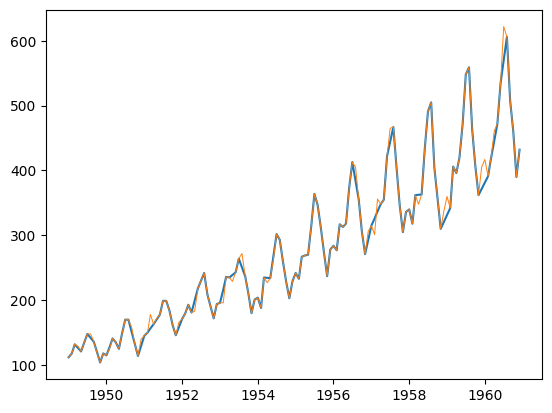

In [8]:
# 6. Сделать задания 1-5 для неполного датасета passengers2.csv, восполненного на ЛР2 каким-либо образом (скользящее среднее, интерполяция/экстраполяция, экспоненциальное сглаживание и т.д.)
# Сравнить результаты исследований, полученные по полным и неполным (восполненным) данным. Сделать словесное описание.

df_fix = pd.read_csv('passengers2.csv')
df_fix["Month"] = pd.to_datetime(df["Month"])

df_fix["target_fixed"] = df_fix["target"].interpolate(method="linear")
print(df_fix.head())

# 1
plt.plot(df_fix["Month"], df_fix["target_fixed"])
plt.plot(df["Month"], df["#Passengers"], linewidth = 0.7)

plt.show()



         Month  reference  target  missing  target_fixed
0   1949-01-01        112   112.0      NaN    112.000000
12  1950-01-01        115   115.0      NaN    115.000000
24  1951-01-01        145   145.0      NaN    145.000000
36  1952-01-01        171   171.0      NaN    171.000000
48  1953-01-01        196   196.0      NaN    196.000000
60  1954-01-01        204   204.0      NaN    204.000000
72  1955-01-01        242   242.0      NaN    242.000000
84  1956-01-01        284   284.0      NaN    284.000000
96  1957-01-01        315   315.0      NaN    315.000000
108 1958-01-01        340   340.0      NaN    340.000000
120 1959-01-01        360     NaN    360.0    331.333333
132 1960-01-01        417     NaN    417.0    381.333333


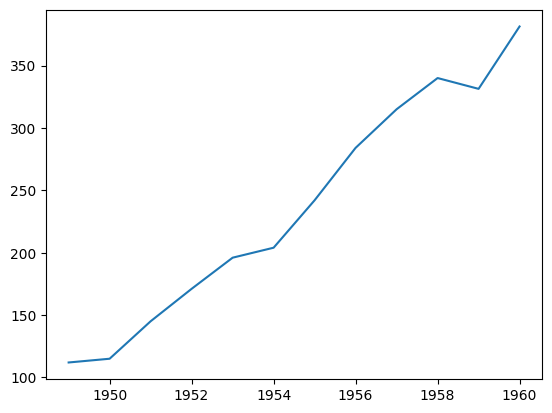

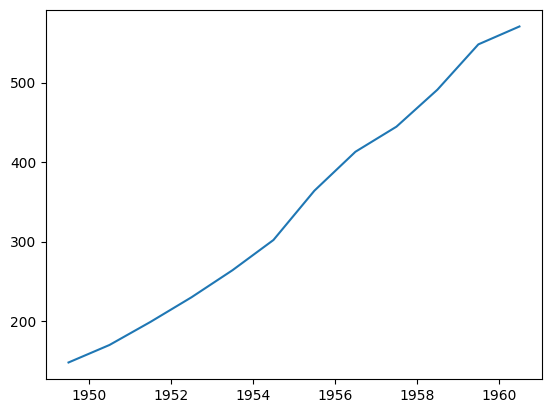

In [9]:
#2
january_df = df_fix[df_fix["Month"].dt.strftime('%m') == '01']
print(january_df)

plt.plot(january_df["Month"], january_df["target_fixed"])
plt.show()


# б) июль
july_df = df_fix[df_fix["Month"].dt.strftime('%m') == '07']

plt.plot(july_df["Month"], july_df["target_fixed"])
plt.show()

#графики (разных датасетов) без явных отличий

In [10]:
#3
df_fix['Year'] = df_fix['Month'].dt.year

yearly_stats = df_fix.groupby('Year').agg({'target_fixed': ['mean', 'var']})

yearly_stats.columns = ['Mean', 'Variance']
print(yearly_stats)

            Mean     Variance
Year                         
1949  126.041667   166.020833
1950  138.416667   348.946970
1951  167.625000   354.823864
1952  198.375000   508.142045
1953  225.708333   615.384470
1954  239.875000  1227.278409
1955  284.000000  1775.818182
1956  325.416667  2096.992424
1957  367.208333  2854.066288
1958  380.680556  4259.466961
1959  423.166667  5520.414141
1960  467.611111  5402.708754


0       NaN
1       6.0
2      14.0
3       5.5
4       5.5
       ... 
139    35.5
140    98.0
141    47.0
142    71.0
143    42.0
Name: abs_diff, Length: 144, dtype: float64


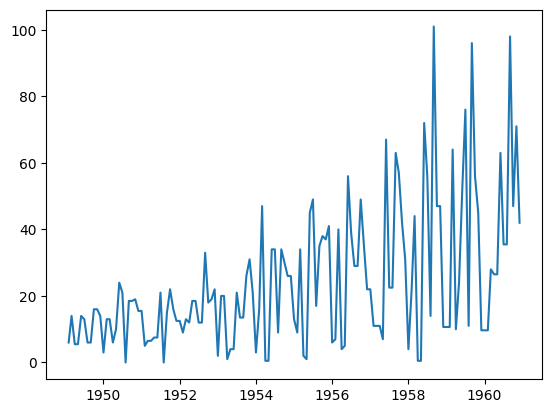

0            NaN
1       5.357143
2      11.864407
3      -2.272727
4      -6.201550
         ...    
139    -2.572347
140   -16.171617
141    -9.251969
142   -15.401302
143    10.769231
Name: rel_diff, Length: 144, dtype: float64


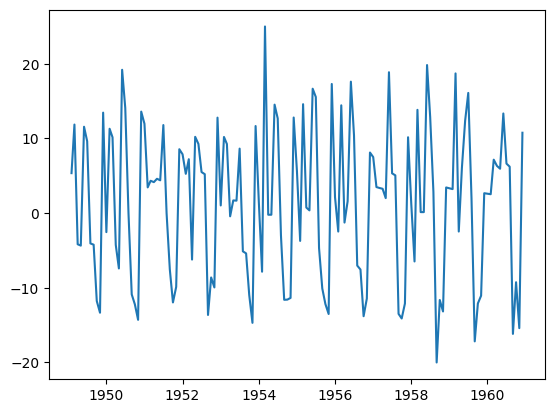

0       NaN
1       6.0
2      14.0
3       3.0
4       8.0
       ... 
139    16.0
140    98.0
141    47.0
142    71.0
143    42.0
Name: abs_diff, Length: 144, dtype: float64


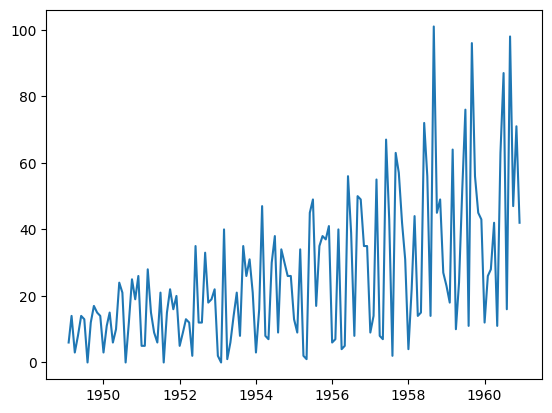

0            NaN
1       5.357143
2      11.864407
3      -2.272727
4      -6.201550
         ...    
139    -2.572347
140   -16.171617
141    -9.251969
142   -15.401302
143    10.769231
Name: rel_diff, Length: 144, dtype: float64


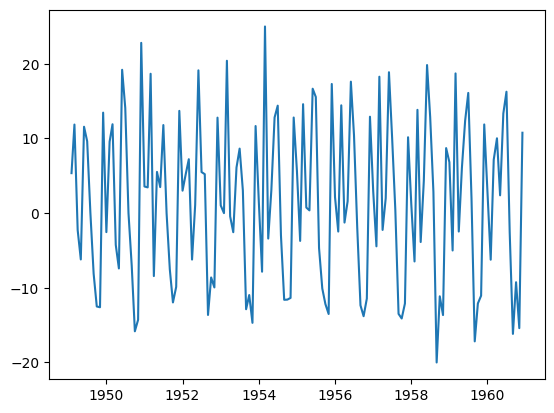

In [11]:
#4
# а) Построить абсолютные разности по данным (между соседними месяцами). Сделать график и описание
df_fix['abs_diff'] = abs(df_fix['target_fixed'].diff())
print(df_fix['abs_diff'])

plt.plot(df_fix['Month'][1:], df_fix['abs_diff'][1:])
plt.show()


# б) Построить относительные разности (в % прироста). Сделать график и описание.

df_fix['rel_diff'] = (df_fix['target_fixed'].pct_change() * 100)
print(df['rel_diff'])

plt.plot(df_fix['Month'][1:], df_fix['rel_diff'][1:])
plt.show()

# ---------------- БЫЛО

df['abs_diff'] = abs(df['#Passengers'].diff())
print(df['abs_diff'])

plt.plot(df['Month'][1:], df['abs_diff'][1:])
plt.show()

#сезонность, положительный тренд, в 1958 пик

# б) Построить относительные разности (в % прироста). Сделать график и описание.

df['rel_diff'] = (df['#Passengers'].pct_change() * 100)
print(df['rel_diff'])

plt.plot(df['Month'][1:], df['rel_diff'][1:])
plt.show()

#Сильный разброс знаечний от отрийательных к положительным

#-----------------------

# Там, где данные были восполнены графики отличаются

In [12]:
#5
yearly_df = df_fix.resample('Y', on='Month').agg({'target_fixed': ['sum', 'mean', 'min', 'max', 'std']}).round(1)
print(yearly_df)

# б) Повышение частоты дискретизации до дня (недели). Рассмотреть целесообразность.

df_1_fix = df_fix.copy()
weekly_df = df_1_fix.resample('W', on='Month').agg({'target_fixed': ['sum', 'mean', 'min', 'max', 'std']}).round(1)
print(weekly_df)


           target_fixed                           
                    sum   mean    min    max   std
Month                                             
1949-12-31       1512.5  126.0  104.0  148.0  12.9
1950-12-31       1661.0  138.4  114.0  170.0  18.7
1951-12-31       2011.5  167.6  145.0  199.0  18.8
1952-12-31       2380.5  198.4  171.0  242.0  22.5
1953-12-31       2708.5  225.7  180.0  264.0  24.8
1954-12-31       2878.5  239.9  188.0  302.0  35.0
1955-12-31       3408.0  284.0  233.0  364.0  42.1
1956-12-31       3905.0  325.4  271.0  413.0  45.8
1957-12-31       4406.5  367.2  305.0  467.0  53.4
1958-12-31       4568.2  380.7  310.0  505.0  65.3
1959-12-31       5078.0  423.2  331.3  559.0  74.3
1960-12-31       5611.3  467.6  381.3  606.0  73.5
           target_fixed                         
                    sum   mean    min    max std
Month                                           
1949-01-02        112.0  112.0  112.0  112.0 NaN
1949-01-09          0.0    NaN    NaN  

C:\Users\Smart\AppData\Local\Temp\ipykernel_17420\3844509621.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_df = df_fix.resample('Y', on='Month').agg({'target_fixed': ['sum', 'mean', 'min', 'max', 'std']}).round(1)
